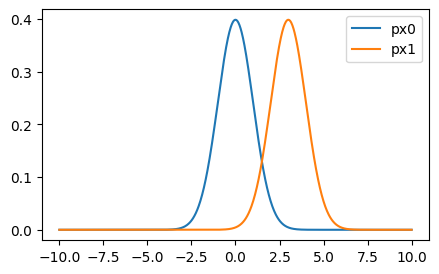

In [3]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

m0, m1 = 0, 3
sig0, sig1 = 1, 1

x = np.linspace(-10, 10, 1000)

px0 = norm.pdf(x,m0,sig0)
px1 = norm.pdf(x,m1,sig1)

plt.figure(figsize=(5,3))
plt.plot(x, px0, label='px0')
plt.plot(x, px1, label='px1')
plt.legend()
plt.show()

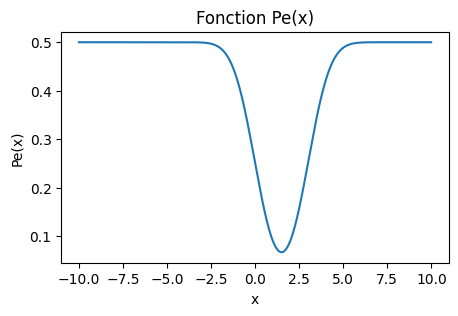

In [20]:
from scipy import special
import scipy.integrate as integrate

def f1(x):
    return norm.pdf(x,m0,sig0)
def f2(x):
    return norm.pdf(x,m1,sig1)

def Pe(xs):
    tab_result = np.zeros((1, len(xs)))
    for k in range(len(xs)):
        int1, _ = integrate.quad(f1, xs[k], np.inf)
        int2, _ = integrate.quad(f2, -np.inf, xs[k])
        tab_result[0, k] = (1/2) * (int1 + int2)
    return tab_result

x_s = np.arange(-10, 10, step=0.01)

plt.figure(figsize=(5, 3))
plt.plot(x_s, Pe(x_s).flatten())
plt.xlabel('x')
plt.ylabel('Pe(x)')
plt.title('Fonction Pe(x)')
plt.show()

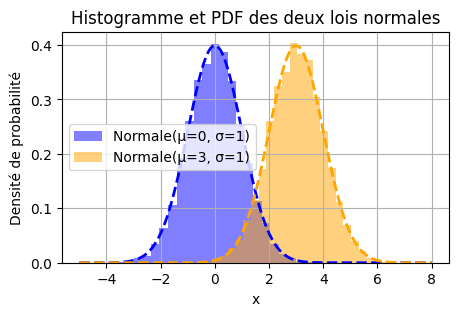

In [4]:
#Echantillons 

# Génération des données pour les deux distributions normales
xw1 = np.random.normal(loc=0, scale=1, size=10000)  # Moyenne = 0, écart-type = 1
xw2 = np.random.normal(loc=3, scale=1, size=10000)  # Moyenne = 3, écart-type = 1

# Création de l'histogramme
plt.figure(figsize=(5, 3))
plt.hist(xw1, bins=25, density=True, alpha=0.5, color='blue', label='Normale(μ=0, σ=1)')
plt.hist(xw2, bins=25, density=True, alpha=0.5, color='orange', label='Normale(μ=3, σ=1)')

# Tracer les courbes de densité de probabilité pour les deux distributions
x = np.linspace(-5, 8, 1000)
y1 = norm.pdf(x, 0, 1)
y2 = norm.pdf(x, 3, 1)
plt.plot(x, y1, color='blue', linestyle='--', linewidth=2)
plt.plot(x, y2, color='orange', linestyle='--', linewidth=2)

# Ajout des légendes et du titre
plt.xlabel('x')
plt.ylabel('Densité de probabilité')
plt.title('Histogramme et PDF des deux lois normales')
plt.legend()

# Affichage du graphique
plt.grid(True)
plt.show()

In [7]:
x0 = 1.5

attrib1 = [1 if x <= x0 else 2 for x in xw1]
attrib2 = [1 if x <= x0 else 2 for x in xw2]

n_error1, n_error2 = 0, 0
for k in range(len(attrib1)):
    if attrib1[k] == 2:
        n_error1 += 1
    if attrib2[k] == 1:
        n_error2 += 1

print("Nombre d'erreurs pour la classe 1 = ", n_error1, ' | value_e = ', n_error1/len(attrib1))
print("Nombre d'erreurs pour la classe 2 = ", n_error2, ' | value_e = ', n_error2/len(attrib1))

Nombre d'erreurs pour la classe 1 =  667  | value_e =  0.0667
Nombre d'erreurs pour la classe 2 =  659  | value_e =  0.0659
